In [1]:
import scipy.io as sio
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
data = sio.loadmat('data/dset.mat')

In [3]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'list_family', 'list_genus', 'list_species', 'X', 'Y_family', 'Y_genus', 'Y_species'])

In [4]:
Y_species = data.get('Y_species')

In [5]:
Y_species

array([[ 2],
       [ 7],
       [ 2],
       ...,
       [ 1],
       [10],
       [ 5]], dtype=int32)

In [6]:
Y_species[0]

array([2], dtype=int32)

In [7]:
Y_genus = data.get('Y_genus')

In [8]:
Y_genus

array([[1],
       [5],
       [1],
       ...,
       [1],
       [8],
       [4]], dtype=int32)

In [9]:
X_vec = data.get('X')

In [10]:
X_vec

array([[-1.        , -0.85208478, -0.5446153 , ...,  0.03081446,
        -0.04646877, -0.10260198],
       [-1.        , -0.83122403, -0.35381633, ..., -0.05976682,
        -0.04458574,  0.01394643],
       [-1.        , -0.87307382, -0.50275353, ...,  0.08532905,
        -0.01570336, -0.07587386],
       ...,
       [-1.        , -0.52845271, -0.09051293, ...,  0.00273226,
        -0.0143477 , -0.00636827],
       [-1.        , -0.8586075 , -0.27509567, ..., -0.00910596,
        -0.00653614, -0.01747479],
       [-1.        , -0.44213437,  0.002258  , ..., -0.0188348 ,
         0.01213924,  0.01604267]])

In [7]:
X_vec[0]

array([-1.        , -0.85208478, -0.5446153 , -0.23023933, -0.15827164,
       -0.10030244, -0.11154368, -0.04217562,  0.05429012, -0.01039922,
       -0.10284336, -0.02367292,  0.00542988, -0.13799486, -0.15663055,
       -0.03263575,  0.02750404,  0.01395437, -0.01718162, -0.04397875,
       -0.0025327 ,  0.03081446, -0.04646877, -0.10260198])

In [11]:
lst_species = data.get('list_species')

In [12]:
lst_species

array([[array(['AdenomeraAndre'], dtype='<U14')],
       [array(['AdenomeraHylaedactylus'], dtype='<U22')],
       [array(['Ameeregatrivittata'], dtype='<U18')],
       [array(['HylaMinuta'], dtype='<U10')],
       [array(['HypsiboasCinerascens'], dtype='<U20')],
       [array(['HypsiboasCordobae'], dtype='<U17')],
       [array(['LeptodactylusFuscus'], dtype='<U19')],
       [array(['OsteocephalusOophagus'], dtype='<U21')],
       [array(['Rhinellagranulosa'], dtype='<U17')],
       [array(['ScinaxRuber'], dtype='<U11')]], dtype=object)

In [10]:
lst_species.size

10

In [11]:
x = np.random.random((10, 5))
y = np.random.random((10, 5))

n = x.shape[1]
cov_bias = np.mean(x * y, axis=1) - np.mean(x, axis=1) * np.mean(y, axis=1)
cov_bias * n / (n-1)

array([ 0.01773218,  0.0082373 ,  0.09795756,  0.03193004,  0.00321138,
       -0.01455587, -0.07308648, -0.05278416, -0.05328468,  0.06120123])

In [13]:
s = np.empty((X_vec.shape[0], 1))
for i in range(X_vec.shape[]):
    print(np.cov(X_vec[i]))

TypeError: 'tuple' object cannot be interpreted as an integer

In [13]:
res1_1 = np.cov(X_vec.T)

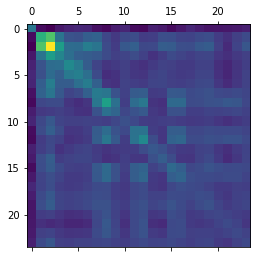

In [14]:
plt.matshow(res1_1)

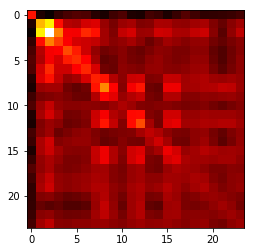

In [15]:
plt.imshow(res1_1,cmap='hot')

In [16]:
def my_mean(matrix):
    """
    Calculates mean values in a matrix
    Parameters:
      matrix: N-by-D data matrix
    Returns:
      mu: D-by-1 column vector of sample mean values, where mu(i) = mean(matrix(:,i)).
    """
    
    # Check if the matrix is not empty to make sure we do not divide by 0.
    if matrix.shape[0] == 0:
        s = 1
    else: 
        s = matrix.shape[0]
    
    # Compute sample mean vector
    mu = (np.sum(matrix, axis=0) / s).T 

    return mu

In [17]:
my_mean(X_vec)

array([-9.74023093e-01, -8.23533833e-01, -4.52956670e-01, -1.52934802e-01,
       -1.13522768e-01, -6.70683332e-02, -7.01563139e-02, -7.87939721e-02,
       -3.39201905e-02, -3.41943458e-02, -6.79849815e-02, -3.06505621e-02,
       -6.81939029e-04, -5.15607191e-02, -7.30336627e-02, -3.58473314e-02,
       -1.59155014e-02, -3.17948169e-02, -4.57046675e-02, -4.37078192e-02,
       -1.10627371e-02,  7.34052998e-03, -2.26644598e-02, -5.04837882e-02])

In [18]:
np.mean(X_vec, axis=0)

array([-9.74023093e-01, -8.23533833e-01, -4.52956670e-01, -1.52934802e-01,
       -1.13522768e-01, -6.70683332e-02, -7.01563139e-02, -7.87939721e-02,
       -3.39201905e-02, -3.41943458e-02, -6.79849815e-02, -3.06505621e-02,
       -6.81939029e-04, -5.15607191e-02, -7.30336627e-02, -3.58473314e-02,
       -1.59155014e-02, -3.17948169e-02, -4.57046675e-02, -4.37078192e-02,
       -1.10627371e-02,  7.34052998e-03, -2.26644598e-02, -5.04837882e-02])

In [19]:
def my_cov(X):
    """
    Calculates covariance of a NxD matrix.
    Parameters:
      matrix: N-by-D data matrix
    Returns:
      cov: D-by-D covariance matrix.
    """
    X_mean = my_mean(X)
    X_shifted = X - X_mean
    # Using Maximum Likelihood Estimation so divide by N
    cov = np.matmul(X_shifted.T, X_shifted) / X.shape[0]
    return cov

In [21]:
res1_1_1 = my_cov(X_vec)

In [22]:
res1_1_2 = np.corrcoef(X_vec.T)

In [42]:
def my_corr_1(X):
    c = my_cov(X)
    try:
        d = np.diag(c)
    except ValueError:
        # scalar covariance
        # nan if incorrect value (nan, inf, 0), 1 otherwise
        return c / c
    stddev = np.sqrt(d.real)
#     print(stddev)
#     print(stddev[None, :])
#     c /= stddev[:, None]
#     c /= stddev[None, :]
    c /= np.dot(stddev.T, stddev)
    return c

In [43]:
def my_corr(X):
    c = my_cov(X)
    try:
        d = np.diag(c)
    except ValueError:
        # scalar covariance
        # nan if incorrect value (nan, inf, 0), 1 otherwise
        return c / c
    stddev = np.sqrt(d.real)
    c /= stddev[:, None]
    c /= stddev[None, :]
    #c /= np.sqrt((np.dot(d.T, d)).real)
    return c

In [44]:
my_corr(X_vec) - res1_1_2

array([[-1.11022302e-16,  5.55111512e-17,  5.55111512e-17,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.38777878e-17,  5.55111512e-17,  5.55111512e-17,
         5.55111512e-17,  8.32667268e-17,  0.00000000e+00,
         5.55111512e-17,  8.32667268e-17,  5.55111512e-17,
         5.55111512e-17,  5.55111512e-17,  2.77555756e-17,
         0.00000000e+00,  5.55111512e-17,  1.11022302e-16,
         0.00000000e+00, -5.55111512e-17,  1.11022302e-16],
       [ 0.00000000e+00,  2.22044605e-16,  1.11022302e-16,
         1.11022302e-16,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -5.55111512e-17,  0.00000000e+00,
         1.38777878e-17, -1.11022302e-16,  0.00000000e+00,
         0.00000000e+00,  2.77555756e-17,  5.55111512e-17,
         5.55111512e-17,  0.00000000e+00, -5.55111512e-17,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.11022302e-16,  0.00000000e

In [37]:
my_corr(X_vec)

array([[ 4.42757229e-02, -1.63996662e-02, -2.21488280e-02,
        -1.12151951e-02, -5.76976269e-03, -3.41938214e-03,
        -4.73949978e-03, -1.44917604e-02, -1.81396747e-02,
        -8.29200932e-03, -4.69453796e-03, -1.62382357e-02,
        -1.81571927e-02, -7.33797905e-03, -1.00509829e-02,
        -1.72214588e-02, -1.02181508e-02, -3.19050648e-03,
        -8.34261873e-03, -1.23561514e-02, -1.16373428e-02,
        -1.10026966e-02, -1.01841155e-02, -7.30097126e-03],
       [-1.63996662e-02,  8.60463065e-02,  1.00994122e-01,
         4.31716699e-02,  2.13489470e-02,  1.90626590e-02,
         2.88770157e-02,  3.14851321e-02,  1.43354131e-02,
         6.19111702e-03,  1.47497991e-02,  1.70702953e-02,
         7.83289590e-03,  9.30057208e-03,  1.87641536e-02,
         1.77569157e-02,  1.23756012e-02,  1.22783286e-02,
         1.61028519e-02,  1.76815671e-02,  7.72661365e-03,
         1.56420133e-03,  1.01719025e-02,  1.60925517e-02],
       [-2.21488280e-02,  1.00994122e-01,  1.47704020e

In [22]:
l = np.array([1,2,3])

In [23]:
l[None, :]

array([[1, 2, 3]])

In [24]:
def my_corr_1(X):
    c = my_cov(X)
    
    try:
        d = np.diag(c)
    except ValueError:
        # scalar covariance
        # nan if incorrect value (nan, inf, 0), 1 otherwise
        return c / c
    std_dev = np.sqrt(d.real)
    c /= (std_dev[:, None] * std_dev[None, :])
    
    return c

In [29]:
my_corr_1(X_vec) - np.corrcoef(X_vec.T)

array([[-1.11022302e-16,  5.55111512e-17,  5.55111512e-17,
         0.00000000e+00,  1.38777878e-17,  0.00000000e+00,
         1.38777878e-17,  5.55111512e-17,  5.55111512e-17,
         5.55111512e-17,  5.55111512e-17,  0.00000000e+00,
         5.55111512e-17,  5.55111512e-17,  5.55111512e-17,
         0.00000000e+00,  0.00000000e+00,  2.77555756e-17,
         5.55111512e-17,  5.55111512e-17,  1.11022302e-16,
        -5.55111512e-17, -5.55111512e-17,  1.11022302e-16],
       [ 0.00000000e+00,  1.11022302e-16,  1.11022302e-16,
         1.11022302e-16,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -2.77555756e-17,
         1.38777878e-17, -1.11022302e-16,  0.00000000e+00,
         0.00000000e+00,  2.77555756e-17,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -6.93889390e-18,  5.55111512e-17,  0.00000000e+00],
       [ 5.55111512e-17,  1.11022302e-16,  1.11022302e

In [47]:
import scipy.linalg as linalg

In [48]:
eig_vals, eigen_vecs = linalg.eig(res1_1)

In [49]:
eig_vals.real

array([1.17617347e-01, 5.56809523e-02, 2.36916919e-02, 1.57641029e-02,
       1.09351768e-02, 8.87613147e-03, 8.34353675e-03, 6.03674048e-03,
       4.45411585e-03, 3.99328186e-03, 3.43976698e-03, 2.12816751e-03,
       1.65638180e-03, 1.46650536e-03, 1.27367717e-03, 5.91667445e-04,
       3.93182029e-04, 2.47898342e-04, 1.26810864e-04, 8.27694401e-05,
       5.09398571e-05, 2.79905539e-05, 1.25722128e-05, 1.80733674e-05])

In [51]:
eig_vals_np, eig_vecs_np = np.linalg.eig(res1_1)

In [53]:
idx = np.argsort(eig_vals_np)[::-1]
EVals = eig_vals_np[idx]
EVecs = eig_vecs_np[:, idx]
EVecs_1 = eig_vecs_np[:, idx]

In [57]:
for i in range(0, EVecs.shape[1]):
    if EVecs[:, i][0] < 0:
        EVecs[:, i] *= -1
EVecs

array([[ 1.36684682e-01,  8.79561052e-02,  1.04043056e-01,
         2.15364587e-01,  6.74122431e-01,  5.27498365e-01,
         1.56956434e-01,  1.54107220e-01,  8.40722788e-02,
         1.70873273e-01,  2.40028779e-01,  9.83511013e-02,
         1.61402470e-01,  8.88755355e-03,  3.95240430e-02,
         3.65798246e-02,  3.27355926e-02,  3.67559782e-02,
         1.54202101e-02,  3.13612308e-03,  5.74640928e-03,
         2.36421230e-03,  6.86891160e-04,  1.53160670e-03],
       [-3.24468121e-01,  2.72571484e-01, -4.27963759e-01,
         8.44055763e-04,  4.60949695e-02, -2.66832106e-02,
         1.47972399e-01,  1.65109110e-01, -4.25561619e-01,
        -1.89486558e-01,  3.99552368e-01, -1.77223964e-01,
        -2.94207213e-02, -2.46094281e-01,  1.28477226e-01,
        -2.93684795e-01,  6.21836116e-02,  1.87504696e-02,
        -9.26299876e-02,  1.05489287e-02,  5.67150746e-03,
        -6.00040090e-03, -2.82918830e-03, -6.95609696e-03],
       [-4.72124233e-01,  4.05143681e-01, -3.71925312e

In [59]:
[ev*(-1) if ev[0] < 0 else ev for ev in EVecs  ]

[array([0.13668468, 0.08795611, 0.10404306, 0.21536459, 0.67412243,
        0.52749837, 0.15695643, 0.15410722, 0.08407228, 0.17087327,
        0.24002878, 0.0983511 , 0.16140247, 0.00888755, 0.03952404,
        0.03657982, 0.03273559, 0.03675598, 0.01542021, 0.00313612,
        0.00574641, 0.00236421, 0.00068689, 0.00153161]),
 array([ 0.32446812, -0.27257148,  0.42796376, -0.00084406, -0.04609497,
         0.02668321, -0.1479724 , -0.16510911,  0.42556162,  0.18948656,
        -0.39955237,  0.17722396,  0.02942072,  0.24609428, -0.12847723,
         0.29368479, -0.06218361, -0.01875047,  0.09262999, -0.01054893,
        -0.00567151,  0.0060004 ,  0.00282919,  0.0069561 ]),
 array([ 0.47212423, -0.40514368,  0.37192531, -0.01379678, -0.02794543,
        -0.11837548,  0.10872543,  0.06486655, -0.13114284, -0.08224107,
         0.1501109 , -0.13535052, -0.00330436, -0.17767976,  0.32124244,
        -0.46480792,  0.04703017, -0.02232239, -0.15421265,  0.03478553,
        -0.01061664,  0.

In [49]:
eigen_vecs-eigen_vecs_np

array([[ 3.60822483e-16, -2.35922393e-16,  8.32667268e-16,
        -4.30729174e-01,  1.34824486e+00,  1.05499673e+00,
         3.13912868e-01,  3.08214440e-01,  1.68144558e-01,
        -2.19269047e-15, -2.96984659e-15, -1.80411242e-16,
        -5.27355937e-16,  1.14491749e-16, -8.04911693e-16,
         4.37150316e-16,  9.02056208e-17,  7.35119564e-02,
         3.08404202e-02,  8.15320034e-16,  1.17093835e-16,
        -4.77048956e-17, -2.39608680e-16,  3.13659689e-16],
       [ 0.00000000e+00,  2.22044605e-16, -1.11022302e-16,
        -1.68811153e-03,  9.21899389e-02, -5.33664212e-02,
         2.95944798e-01,  3.30218220e-01, -8.51123237e-01,
        -2.27595720e-15,  8.16013923e-15, -1.38777878e-16,
         4.72538675e-15, -1.11022302e-15, -1.83186799e-15,
        -1.66533454e-16, -5.48172618e-16,  3.75009392e-02,
        -1.85259975e-01, -4.74099926e-15, -1.00700698e-15,
        -8.32667268e-17, -1.47451495e-16, -1.54607230e-15],
       [ 0.00000000e+00,  5.55111512e-16,  1.66533454e

In [54]:
cum_var = np.cumsum(EVals)

In [62]:
size = EVals.size - 1

In [63]:
req_cov_lst = [0.70, 0.80, 0.90, 0.95]
MinDims = np.zeros((len(req_cov_lst),), dtype=np.int32)
for i, cov_for in enumerate(req_cov_lst):
    for k in range(size):
        if cum_var[k]/cum_var[size] >= cov_for:
            MinDims[i] = k
            break

In [64]:
MinDims

array([2, 4, 6, 9], dtype=int32)

In [73]:
def task1_3(X):
    # Input:
    # X: N * D matrix (double)
    # Output:
    # Evecs: D-by-D matrix (double) contains all eigenvectors as columns
    # NB: follow the Task 1.3 specifications on eigenvectors.
    # EVals: Eigenvalues in descending order, D x 1 vector
    # (Note that the i-th columns of Evecs should corresponds to the i-th element in EVals)

    covar_mat = X
    eigen_vals, eigen_vecs = np.linalg.eig(covar_mat)
    idx = np.argsort(eigen_vals)[::-1]
    EVals = eigen_vals[idx]
    EVecs = eigen_vecs[:, idx]

    # Change direction of negative evecs
    np.apply_along_axis(lambda x : x*(-1) if x[0] < 0 else x, 0, EVecs)
    # caluclate the cumulative variance
    cum_var = np.cumsum(EVals)
    # calculate min number of PCA dimensions required for the following percentages
    req_cov_lst = [0.70, 0.80, 0.90, 0.95]
    MinDims = np.zeros((len(req_cov_lst),), dtype=np.int32)
    for i, cov_for in enumerate(req_cov_lst):
        for k in range(EVals.size):
            if cum_var[k]/cum_var[EVals.size - 1] >= cov_for:
                MinDims[i] = k
                break
    sio.savemat('t1_EVecs.mat', mdict={'EVecs': EVecs})
    sio.savemat('t1_EVals.mat', mdict={'EVals': EVals})
    sio.savemat('t1_Cumvar.mat', mdict={'Cumvar': cum_var})
    sio.savemat('t1_MinDims.mat', mdict={'MinDims': MinDims})



In [74]:
task1_3(res1_1)

In [79]:
my_cov(X_vec)

array([[ 1.18148335e-02, -4.37619788e-03, -5.91034314e-03,
        -2.99273854e-03, -1.53964252e-03, -9.12451066e-04,
        -1.26472019e-03, -3.86707941e-03, -4.84051355e-03,
        -2.21269588e-03, -1.25272227e-03, -4.33312070e-03,
        -4.84518817e-03, -1.95811598e-03, -2.68207230e-03,
        -4.59549058e-03, -2.72668050e-03, -8.51376339e-04,
        -2.22620083e-03, -3.29719906e-03, -3.10538730e-03,
        -2.93603402e-03, -2.71759829e-03, -1.94824057e-03],
       [-4.37619788e-03,  2.29611787e-02,  2.69499550e-02,
         1.15202205e-02,  5.69689747e-03,  5.08680892e-03,
         7.70573827e-03,  8.40170570e-03,  3.82535864e-03,
         1.65207956e-03,  3.93593619e-03,  4.55515311e-03,
         2.09018294e-03,  2.48182759e-03,  5.00715371e-03,
         4.73837554e-03,  3.30238917e-03,  3.27643229e-03,
         4.29699397e-03,  4.71826900e-03,  2.06182187e-03,
         4.17402067e-04,  2.71433930e-03,  4.29424538e-03],
       [-5.91034314e-03,  2.69499550e-02,  3.94143401e

In [80]:
a

array([[ 9.60535819e-01,  7.97764773e-01,  4.35279913e-01,
         1.45969290e-01,  1.09034155e-01,  6.44136542e-02,
         6.70691496e-02,  7.28800689e-02,  2.81985353e-02,
         3.10933865e-02,  6.49662197e-02,  2.55212346e-02,
        -4.18096381e-03,  4.82632151e-02,  6.84544017e-02,
         3.03206380e-02,  1.27753854e-02,  3.01175096e-02,
         4.22912007e-02,  3.92752261e-02,  7.66997406e-03,
        -1.00858797e-02,  1.93581090e-02,  4.72241349e-02],
       [ 7.97764773e-01,  7.01169153e-01,  3.99975098e-01,
         1.37467204e-01,  9.91867374e-02,  6.03198504e-02,
         6.54818364e-02,  7.32912075e-02,  3.17597831e-02,
         2.98122802e-02,  5.99238686e-02,  2.97969280e-02,
         2.65178281e-03,  4.49438242e-02,  6.51528459e-02,
         3.42598658e-02,  1.64093430e-02,  2.94605398e-02,
         4.19363340e-02,  4.07131368e-02,  1.11723601e-02,
        -5.62777272e-03,  2.13792888e-02,  4.58693529e-02],
       [ 4.35279913e-01,  3.99975098e-01,  2.44584085e